In [2]:
%matplotlib inline
import numpy as np
import matplotlib
import os
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)

In [3]:
endvi_img_dir = "/home/dat/Workspace/Thesis/lettuce_detector/data/raw/2017-10-27_ENDVI/lettuce"
csv_file = "/home/dat/Workspace/Thesis/data/Spreadsheet/Lettuce/2017-10-27.csv"

### Distribution of ENDVI values

In [4]:
lettuce_endvi = {}
for fname in os.listdir(endvi_img_dir):
    img = np.asarray(Image.open(os.path.join(endvi_img_dir, fname)).convert("L"))
    endvi = img / 256
    lettuce_endvi[fname.split(".")[0]] = np.average(endvi)

In [5]:
endvi_values = list(lettuce_endvi.values())

print("Average: %.4f" % np.average(endvi_values))
print("Std Dev: %.4f" % np.std(endvi_values))

Average: 0.2530
Std Dev: 0.0132


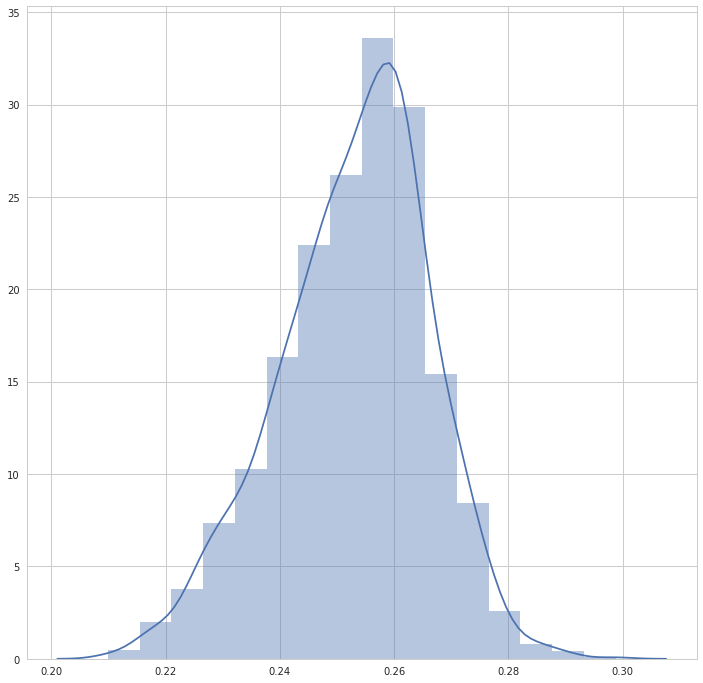

In [6]:
sns.distplot(endvi_values, bins=16)

In [7]:
nitrogen_endvi = {}
irrigation_endvi = {}
for treatment in [100, 50, 25, 0]:
    nitrogen_endvi[treatment] = []
    irrigation_endvi[treatment] = []
    for k, v in lettuce_endvi.items():
        if "N{}".format(treatment) in k:
            nitrogen_endvi[treatment].append(v)
        if "IR{}".format(treatment) in k:
            irrigation_endvi[treatment].append(v)

In [8]:
nitrogen_avg = {k:np.average(values) for k, values in nitrogen_endvi.items()}
nitrogen_stddev = {k:np.std(values) for k, values in nitrogen_endvi.items()}

print(nitrogen_avg)
print(nitrogen_stddev)

{100: 0.25391838098726771, 50: 0.25025987354050522, 25: 0.25287932581871203, 0: 0.25474368734034997}
{100: 0.013872295052733944, 50: 0.013780038391109226, 25: 0.011313652350529089, 0: 0.013158007718779088}


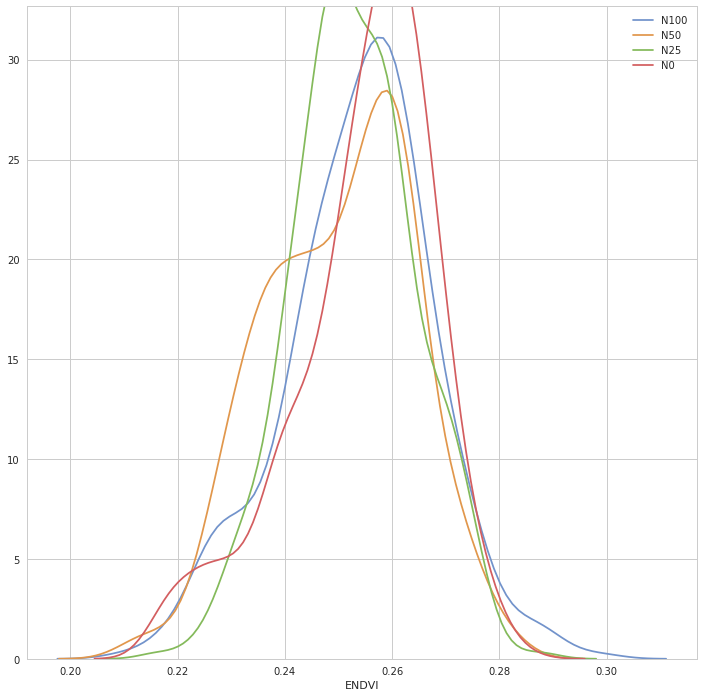

In [9]:
sns.distplot(nitrogen_endvi[100], bins=16, hist=False, color="#7293CB", label="N100")
sns.distplot(nitrogen_endvi[50],  bins=16, hist=False, color="#E1974C", label="N50")
sns.distplot(nitrogen_endvi[25],  bins=16, hist=False, color="#84BA5B", label="N25")
sns.distplot(nitrogen_endvi[0],   bins=16, hist=False, color="#D35E60", label="N0", axlabel="ENDVI")

In [10]:
irrigation_avg = {k:np.average(values) for k, values in irrigation_endvi.items()}
irrigation_stddev = {k:np.std(values) for k, values in irrigation_endvi.items()}

print(irrigation_avg)
print(irrigation_stddev)

{100: 0.25836163696106296, 50: 0.25416053185267579, 25: 0.25244313562293236, 0: 0.2468475023666781}
{100: 0.014557825266326454, 50: 0.011352797690195888, 25: 0.011738111166278913, 0: 0.012268283579757972}


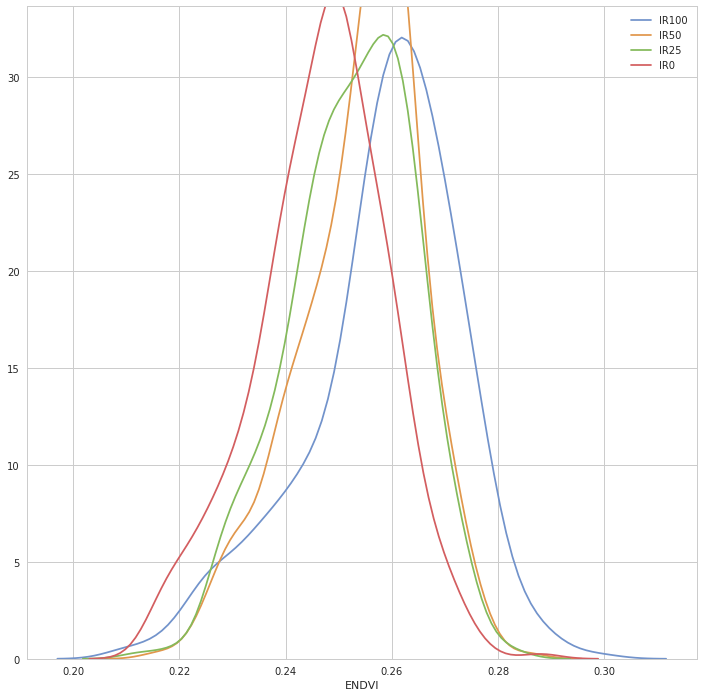

In [11]:
sns.distplot(irrigation_endvi[100], bins=16, hist=False, color="#7293CB", label="IR100")
sns.distplot(irrigation_endvi[50],  bins=16, hist=False, color="#E1974C", label="IR50")
sns.distplot(irrigation_endvi[25],  bins=16, hist=False, color="#84BA5B", label="IR25")
sns.distplot(irrigation_endvi[0],   bins=16, hist=False, color="#D35E60", label="IR0", axlabel="ENDVI")

### Analyze ground data

In [12]:
df = pd.read_csv(csv_file)
df.head()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count
0,0,0,1,104,48.9,0.805878,-4.80,6,7
1,0,0,1,113,44.4,0.815393,NaN,6,7
2,0,0,2,104,48.8,0.839747,-4.24,4,6
3,0,0,2,113,53.5,0.819832,NaN,4,6
4,0,0,3,104,51.9,0.812323,-4.82,7,6


In [13]:
pre_df = {
    "Nitrogen": [],
    "Irrigation": [],
    "Replication": [],
    "Plant Number": [],
    "ENDVI": [],
}
for k, v in lettuce_endvi.items():
    nitrogen = int(re.search("N(.*)IR.*", k).group(1))
    irrigation = int(re.search(".*IR(.*)Rep.*", k).group(1))
    replication = int(re.search(".*Rep(.*)_", k).group(1))
    number = int(re.search(".*_(.*)", k).group(1))
    
    if number == 104 or number == 113:
        pre_df["Nitrogen"].append(nitrogen)
        pre_df["Irrigation"].append(irrigation)
        pre_df["Replication"].append(replication)
        pre_df["Plant Number"].append(number)
        pre_df["ENDVI"].append(v)

endvi_df = pd.DataFrame(data=pre_df)

In [14]:
merged_df = pd.merge(df, endvi_df, on=["Nitrogen", "Irrigation", "Replication", "Plant Number"])
merged_df.head()

,Nitrogen,Irrigation,Replication,Plant Number,Chlorophyll,NDVI,WP,Average Height,Average Leaf Count,ENDVI
0,0,0,1,104,48.9,0.805878,-4.80,6,7,0.261657
1,0,0,1,113,44.4,0.815393,NaN,6,7,0.259791
2,0,0,2,104,48.8,0.839747,-4.24,4,6,0.224187
3,0,0,2,113,53.5,0.819832,NaN,4,6,0.240120
4,0,0,3,104,51.9,0.812323,-4.82,7,6,0.257219


In [15]:
print("ENDVI & Chlorophyll:", stats.pearsonr(merged_df["ENDVI"], merged_df["Chlorophyll"])[0])
print("ENDVI & NDVI:", stats.pearsonr(merged_df["ENDVI"], merged_df["NDVI"])[0])
print("ENDVI & Height:", stats.pearsonr(merged_df["ENDVI"], merged_df["Average Height"])[0])
print("ENDVI & Leaf Count:", stats.pearsonr(merged_df["ENDVI"], merged_df["Average Leaf Count"])[0])
print("ENDVI & WP:", stats.pearsonr(merged_df.dropna()["ENDVI"], merged_df.dropna()["WP"])[0])

ENDVI & Chlorophyll: -0.006427985976
ENDVI & NDVI: -0.0459102150746
ENDVI & Height: 0.242569325331
ENDVI & Leaf Count: 0.112490489074
ENDVI & WP: 0.171711413413
ENDVI & Irrigation: 0.30724134604
ENDVI & Nitrogen: -0.0637619519483


In [16]:
# Drop data of area with broken irrigation
df = df[(df.Nitrogen != 25) | (df.Irrigation != 0) | (df.Replication != 3)]

In [17]:
print("ENDVI & Irrigation:", stats.pearsonr(merged_df.dropna()["ENDVI"], merged_df.dropna()["Irrigation"])[0])
print("ENDVI & Nitrogen:", stats.pearsonr(merged_df.dropna()["ENDVI"], merged_df.dropna()["Nitrogen"])[0])

ENDVI & Irrigation: 0.30724134604
ENDVI & Nitrogen: -0.0637619519483
